In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from pyGRNN import GRNN
from sklearn.cluster import KMeans
from lazypredict.Supervised import LazyRegressor


In [2]:
from sklearn.metrics import mean_absolute_error
from numpy import sqrt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, max_error, median_absolute_error, mean_absolute_error

def print_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    print(f'Mean Squared Error (MSE):              {mse:.10f}')
    
    rmse = sqrt(mse)
    print(f'Root Mean Squared Error (RMSE):        {rmse:.10f}')
    
    mae = mean_absolute_error(y_true, y_pred)
    print(f'Mean Absolute Error (MAE):             {mae:.10f}')
    
    r2 = r2_score(y_true, y_pred)
    print(f'R-squared (R²):                        {r2:.10f}')
    
    mape = mean_absolute_percentage_error(y_true, y_pred)
    print(f'Mean Absolute Percentage Error (MAPE): {mape:.10f}')    
    
    me = max_error(y_true, y_pred)
    print(f'Max Error (ME):                        {me:.10f}')    
    
    med_ae = median_absolute_error(y_true, y_pred)
    print(f'Median Absolute Error (MedAE):         {med_ae:.10f}') 

In [3]:
df = pd.read_csv('data/train.csv')
df.head(10)

,max_discharge_sum_r1,max_discharge_sum_r2_1,max_discharge_sum_r2_2,max_discharge_sum_r3,flood_sum_r1,flood_sum_r2_1,flood_sum_r2_2,flood_sum_r3,HW_inund_uncertainty,bridge_scour_uncertainty,travel_demand_uncertainty,restoration_capacity_uncertainty,dir_costs,lost_trips_costs_s_r,traffic_costs_s_r
0,585.669565,1626.362646,1917.919430,638.858438,8411.140723,31506.112765,22090.545196,15338.736641,1.028415,1.140250,0.763417,6,3.340766e+07,6.390603e+07,-1.387608e+07
1,577.557845,1643.059879,1887.656759,821.350990,8428.714304,31464.769187,21934.204673,17058.632353,1.028008,0.908724,1.138794,5,2.622206e+07,5.535979e+07,9.384497e+06
2,772.575113,1672.017477,1803.841771,494.527298,9338.140945,31334.393859,21498.213911,13903.405134,1.081371,0.949278,1.057013,3,2.526532e+07,5.933291e+07,5.139631e+06
3,522.083261,1653.122228,3326.489392,460.208237,8055.620780,40539.300119,32937.770259,13073.489518,1.051976,1.264463,0.979334,3,5.486000e+07,9.421211e+07,2.127731e+06
4,614.144564,1644.183921,2485.551499,595.062726,8529.557570,34186.482882,28422.797907,14950.683896,0.786564,0.703410,1.233351,4,3.921215e+07,7.632145e+07,2.113208e+07
5,813.288970,1669.059934,1877.527825,680.463375,9701.224093,31193.165234,22297.853693,15652.704965,0.783139,1.379349,0.876307,6,3.225823e+07,7.616296e+07,-6.506723e+06
6,663.211125,1666.035202,2230.319808,671.192423,8806.258837,32504.615705,26343.616164,15618.296388,0.879739,0.739705,0.639232,6,3.501944e+07,3.283001e+07,-1.755404e+07
7,501.752017,1726.178830,2023.484977,993.980349,8031.132240,32844.961063,22531.504746,18555.229803,0.639638,0.353749,1.191593,5,2.881552e+07,7.138991e+07,1.742383e+07
8,581.130243,1669.379831,1976.993224,1105.226828,8297.437471,32213.132745,22180.596511,19413.062434,0.974252,0.517781,0.941533,6,3.182847e+07,5.681803e+07,-2.533089e+06
9,622.458211,1636.290754,2176.796189,457.469364,8532.337554,32557.583545,24402.157344,13253.838280,0.860631,1.257677,1.158570,4,4.565669e+07,6.153274e+07,1.404378e+07


In [4]:
y1_name, y2_name, y3_name = "dir_costs","traffic_costs_s_r","lost_trips_costs_s_r" 
y1, y2, y3 = df[y1_name], df[y2_name], df[y3_name]

In [5]:
# 1. scale features
X = df.drop(columns=[y1_name, y2_name, y3_name])
scaler = MaxAbsScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

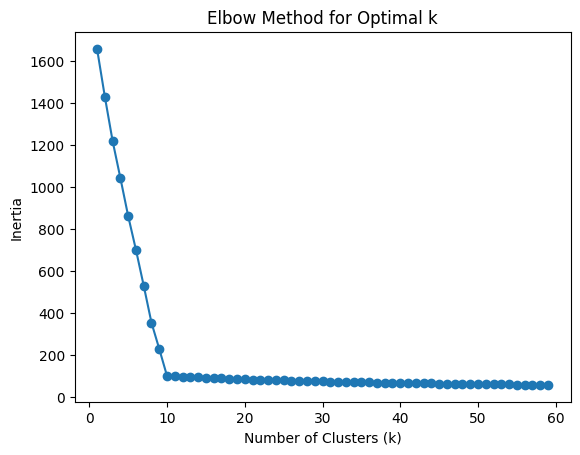

In [315]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assume X is your data
inertia = []
for n_clusters in range(1, 60):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow
plt.plot(range(1, 60), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

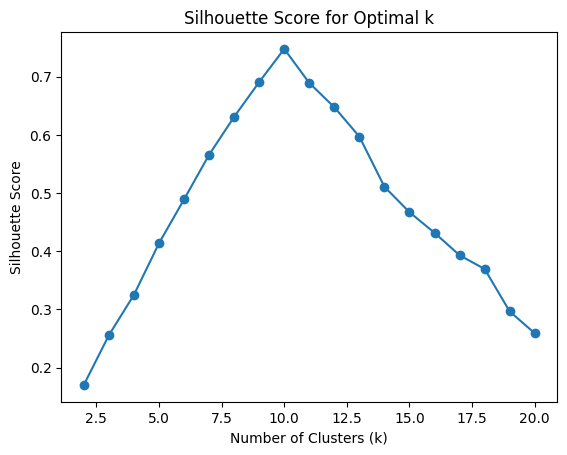

In [313]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assume X is your data
silhouette_scores = []
for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled_df)
    silhouette_scores.append(silhouette_score(X_scaled_df, labels))

# Plot silhouette scores
plt.plot(range(2, 21), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [282]:
# 2. add clusters
k = 10

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled_df)
labels = kmeans.labels_
# Add the cluster labels to the DataFrame
X_scaled_df['Cluster'] = labels
dummy_columns = pd.get_dummies(X_scaled_df['Cluster'], prefix='class')
X_scaled_df = pd.concat([X_scaled_df, dummy_columns], axis=1)
X_scaled_df = X_scaled_df.drop("Cluster", axis=1)

/home/lavuna47/Projects/Diploma/venv/lib64/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [283]:
X_scaled_df.head(10)

,max_discharge_sum_r1,max_discharge_sum_r2_1,max_discharge_sum_r2_2,max_discharge_sum_r3,flood_sum_r1,flood_sum_r2_1,flood_sum_r2_2,flood_sum_r3,HW_inund_uncertainty,bridge_scour_uncertainty,...,class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_9
0,0.484737,0.684661,0.225945,0.520840,0.699666,0.363086,0.362134,0.758509,0.497242,0.635596,...,False,False,False,False,False,False,True,False,False,False
1,0.478023,0.691690,0.222379,0.669620,0.701128,0.362609,0.359571,0.843559,0.497045,0.506539,...,False,False,False,False,False,False,False,False,False,True
2,0.639432,0.703880,0.212505,0.403172,0.776777,0.361107,0.352424,0.687531,0.522847,0.529144,...,False,False,False,False,False,True,False,False,False,False
3,0.432109,0.695926,0.391884,0.375192,0.670093,0.467187,0.539955,0.646491,0.508634,0.704834,...,False,False,False,False,False,False,False,False,True,False
4,0.508305,0.692163,0.292816,0.485135,0.709517,0.393975,0.465940,0.739319,0.380306,0.392093,...,False,False,False,False,False,True,False,False,False,False
5,0.673129,0.702635,0.221186,0.554759,0.806980,0.359479,0.365533,0.774035,0.378650,0.768873,...,False,False,False,False,False,False,True,False,False,False
6,0.548915,0.701362,0.262748,0.547201,0.732534,0.374593,0.431856,0.772333,0.425357,0.412325,...,True,False,False,False,False,False,False,False,False,False
7,0.415282,0.726681,0.238381,0.810359,0.668056,0.378515,0.369363,0.917566,0.309267,0.197186,...,False,False,True,False,False,False,False,False,False,False
8,0.480980,0.702770,0.232904,0.901055,0.690208,0.371234,0.363610,0.959987,0.471054,0.288620,...,False,False,True,False,False,False,False,False,False,False
9,0.515186,0.688840,0.256442,0.372960,0.709748,0.375203,0.400029,0.655410,0.416118,0.701051,...,False,False,False,False,False,False,False,False,True,False


In [284]:
# 4. train GRNN for each dataset
grnn1 = GRNN()
grnn1.fit(X_scaled_df, y1)
y_pred1 = grnn1.predict(X_scaled_df)
print("Sigma1 = ", grnn1.sigma)

grnn2 = GRNN()
grnn2.fit(X_scaled_df, y2)
y_pred2 = grnn2.predict(X_scaled_df)
print("Sigma2 = ", grnn2.sigma)

grnn3 = GRNN()
grnn3.fit(X_scaled_df, y3)
y_pred3 = grnn3.predict(X_scaled_df)
print("Sigma3 = ", grnn3.sigma)

X1, X2, X3 = X_scaled_df.copy(deep=True), X_scaled_df.copy(deep=True), X_scaled_df.copy(deep=True)
X3["GRNN1"] = X2["GRNN1"] = X1["GRNN1"] = y_pred1
X3["GRNN2"] = X2["GRNN2"] = X1["GRNN2"] = y_pred2
X3["GRNN3"] = X2["GRNN3"] = X1["GRNN3"] = y_pred3


Executing warm start...
Warm start concluded. The optimum isotropic sigma is [0.07759374]
Gradient search concluded. The optimum sigma is [0.06431615 0.02068963 0.01609462 0.71081714 5.41707759 1.17477872
 0.03846657 1.03158035 0.33788862 0.97183265 0.43128598 0.82558112
 0.078      0.078      0.078      0.078      0.078      0.078
 0.078      0.078      0.078      0.078     ]
Sigma1 =  [0.06431615 0.02068963 0.01609462 0.71081714 5.41707759 1.17477872
 0.03846657 1.03158035 0.33788862 0.97183265 0.43128598 0.82558112
 0.078      0.078      0.078      0.078      0.078      0.078
 0.078      0.078      0.078      0.078     ]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [0.06845064]
Gradient search concluded. The optimum sigma is [1.56418311e-01 5.03200655e-02 6.08234926e-02 2.86035356e+01
 8.94409133e+00 6.19084082e+01 5.89682179e+01 3.74483815e+01
 1.07253541e+01 4.18497662e-01 2.27703347e-02 9.64677829e-02
 6.80000000e-02 6.80000000e-02 6.80000000e-02 6

In [322]:
# 6. final datasets (scaled)
# X1
X1_scaler = MaxAbsScaler()
X1_scaler.fit(X1)
X1_scaled = X1_scaler.transform(X1)

# X2
X2_scaler = MaxAbsScaler()
X2_scaler.fit(X2)
X2_scaled = X2_scaler.transform(X2)
 
# X3
X3_scaler = MaxAbsScaler()
X3_scaler.fit(X1)
X3_scaled = X3_scaler.transform(X3)


In [323]:
X1_scaled

array([[ 0.4847371 ,  0.68466057,  0.2259446 , ...,  0.19332265,
        -0.07699007,  0.12991939],
       [ 0.47802333,  0.69168972,  0.22237944, ...,  0.19883794,
         0.07107508,  0.20445677],
       [ 0.63943193,  0.70388019,  0.21250543, ...,  0.16908004,
         0.05351958,  0.20381517],
       ...,
       [ 0.7129998 ,  0.71451293,  0.44078162, ...,  0.37801739,
         0.11606311,  0.31355699],
       [ 0.42912264,  0.7114071 ,  0.20328418, ...,  0.15367351,
         0.05174487,  0.11528528],
       [ 0.52636049,  0.69327397,  0.239317  , ...,  0.21680497,
         0.02501931,  0.16393382]])

In [324]:
# Make datasets to be used in ML
df1_scaled = pd.concat([pd.DataFrame(X1_scaled, columns=X1.columns), y1], axis=1)
df2_scaled = pd.concat([pd.DataFrame(X2_scaled, columns=X2.columns), y2], axis=1)
df3_scaled = pd.concat([pd.DataFrame(X3_scaled, columns=X3.columns), y3], axis=1)

In [325]:
# Store those datasets
df1_scaled.to_csv("data/preprocessed_train_y1.csv", index=False)
df2_scaled.to_csv("data/preprocessed_train_y2.csv", index=False)
df3_scaled.to_csv("data/preprocessed_train_y3.csv", index=False)


<h3> Test & print evaluation metrics: dataset1 </h3>

In [326]:
test_df = pd.read_csv('data/test.csv')

In [327]:
test_y1, test_y2, test_y3 = test_df[y1_name], test_df[y2_name], test_df[y3_name]

In [328]:
test_X = test_df.drop(columns=[y1_name, y2_name, y3_name])

In [329]:
test_X.shape

(404, 12)

In [330]:
# preprocess...
X_test_scaled = scaler.transform(test_X)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=test_X.columns)

In [331]:
test_clusters = kmeans.predict(X_test_scaled_df)
X_test_scaled_df["Cluster"] = test_clusters
test_dummy_columns = pd.get_dummies(X_test_scaled_df['Cluster'], prefix='class')
X_test_scaled_df = pd.concat([X_test_scaled_df, test_dummy_columns], axis=1)
X_test_scaled_df = X_test_scaled_df.drop("Cluster", axis=1)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- class_0
- class_1
- class_2
- class_3
- class_4
- ...


In [297]:
X_test_scaled_df

,max_discharge_sum_r1,max_discharge_sum_r2_1,max_discharge_sum_r2_2,max_discharge_sum_r3,flood_sum_r1,flood_sum_r2_1,flood_sum_r2_2,flood_sum_r3,HW_inund_uncertainty,bridge_scour_uncertainty,...,class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_9
0,0.86,0.71,0.31,0.33,0.88,0.38,0.50,0.62,0.38,0.49,...,False,False,False,False,False,False,False,True,False,False
1,0.47,0.71,0.20,0.73,0.70,0.36,0.33,0.88,0.58,0.50,...,False,False,True,False,False,False,False,False,False,False
2,0.68,0.70,0.20,0.40,0.80,0.36,0.32,0.68,0.34,0.69,...,False,False,False,False,False,False,False,True,False,False
3,0.44,0.70,0.34,0.31,0.67,0.37,0.55,0.60,0.50,0.47,...,False,False,False,False,False,False,False,False,True,False
4,0.55,0.69,0.22,0.46,0.74,0.36,0.34,0.72,0.47,0.69,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.55,0.72,0.27,0.51,0.73,0.39,0.41,0.76,0.55,0.43,...,True,False,False,False,False,False,False,False,False,False
400,0.44,0.71,0.28,0.66,0.68,0.36,0.46,0.85,0.32,0.75,...,False,False,False,False,False,False,True,False,False,False
401,0.53,0.71,0.25,0.54,0.73,0.37,0.39,0.77,0.36,0.55,...,False,False,False,False,False,True,False,False,False,False
402,0.52,0.70,0.29,0.47,0.72,0.39,0.46,0.73,0.49,0.49,...,False,False,False,False,False,True,False,False,False,False


In [298]:
test_y_pred1 = grnn1.predict(X_test_scaled_df)
test_y_pred2 = grnn2.predict(X_test_scaled_df)
test_y_pred3 = grnn3.predict(X_test_scaled_df)
test_X1, test_X2, test_X3 = X_test_scaled_df.copy(deep=True), X_test_scaled_df.copy(deep=True), X_test_scaled_df.copy(deep=True)


In [299]:
test_X3["GRNN1"] = test_X2["GRNN1"] = test_X1["GRNN1"] = test_y_pred1
test_X3["GRNN2"] = test_X2["GRNN2"] = test_X1["GRNN2"] = test_y_pred2
test_X3["GRNN3"] = test_X2["GRNN3"] = test_X1["GRNN3"] = test_y_pred3

In [300]:
# test datasets (scaled)
test_X1_scaled = X1_scaler.transform(test_X1)
test_X2_scaled = X2_scaler.transform(test_X2) 
test_X3_scaled = X3_scaler.transform(test_X3)

<h3> Train each model using lazy regression </h3>

In [301]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np
import pandas as pd

In [314]:
reg1 = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models1, predictions1 = reg1.fit(X1_scaled, test_X1_scaled, y1, test_y1)
predictions1

 76%|███████▌  | 32/42 [00:09<00:05,  1.70it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:12<00:00,  3.48it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3578
[LightGBM] [Info] Number of data points in the train set: 1616, number of used features: 15
[LightGBM] [Info] Start training from score 36977500.275990
                               Adjusted R-Squared  R-Squared        RMSE  \
Model                                                                      
OrthogonalMatchingPursuit                    0.87       0.88  4898245.19   
GradientBoostingRegressor                    0.87       0.88  4898532.66   
OrthogonalMatchingPursuitCV                  0.87       0.88  4900260.46   
LarsCV                                       0.87       0.87  4905724.93   
RandomForestRegressor                        0.86       0.87  4938687.08   
LassoLarsCV                                  0.86       0.87  4940375.16   
ExtraTreesRegressor                         

In [303]:
reg2 = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models2, predictions2 = reg2.fit(X2_scaled, test_X2_scaled, y2, test_y2)
predictions2

 21%|██▏       | 9/42 [00:01<00:06,  5.39it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 71%|███████▏  | 30/42 [00:06<00:02,  4.49it/s]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.
QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:09<00:00,  4.40it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3608
[LightGBM] [Info] Number of data points in the train set: 1616, number of used features: 25
[LightGBM] [Info] Start training from score 2376948.061796
                               Adjusted R-Squared  R-Squared        RMSE  \
Model                                                                      
DecisionTreeRegressor                        0.81       0.82  6388993.49   
BaggingRegressor                             0.81       0.82  6446242.06   
RandomForestRegressor                        0.81       0.82  6459960.26   
ExtraTreesRegressor                          0.80       0.82  6522479.90   
OrthogonalMatchingPursuit                    0.80       0.81  6547122.79   
OrthogonalMatchingPursuitCV                  0.80       0.81  6547122.79   
LGBMRegressor                                

In [304]:
reg3 = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models3, predictions3 = reg3.fit(X3_scaled, test_X3_scaled, y3, test_y3)
predictions3

 76%|███████▌  | 32/42 [00:09<00:05,  1.82it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:12<00:00,  3.37it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000489 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3608
[LightGBM] [Info] Number of data points in the train set: 1616, number of used features: 25
[LightGBM] [Info] Start training from score 61132553.259901
                               Adjusted R-Squared  R-Squared        RMSE  \
Model                                                                      
PoissonRegressor                             0.64       0.66 18711702.37   
LarsCV                                       0.62       0.64 19194760.74   
SGDRegressor                                 0.62       0.64 19243706.49   
LassoLarsCV                                  0.61       0.64 19353968.18   
LassoCV                                      0.61       0.64 19356102.92   
OrthogonalMatchingPursuit                    0.61       0.64 19371544.10   
OrthogonalMatchingPursuitCV                 